In [1]:
#import all the libraries that will be used]
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


In [2]:
bike_day = pd.read_csv('day.csv')
bike_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Understanding and cleaning data

In [3]:
#drop registered and casual column as cnt gives total rented bikes
bike_day = bike_day.drop(['casual','registered'], axis=1)

In [4]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 79.9+ KB


### Visualizing the data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

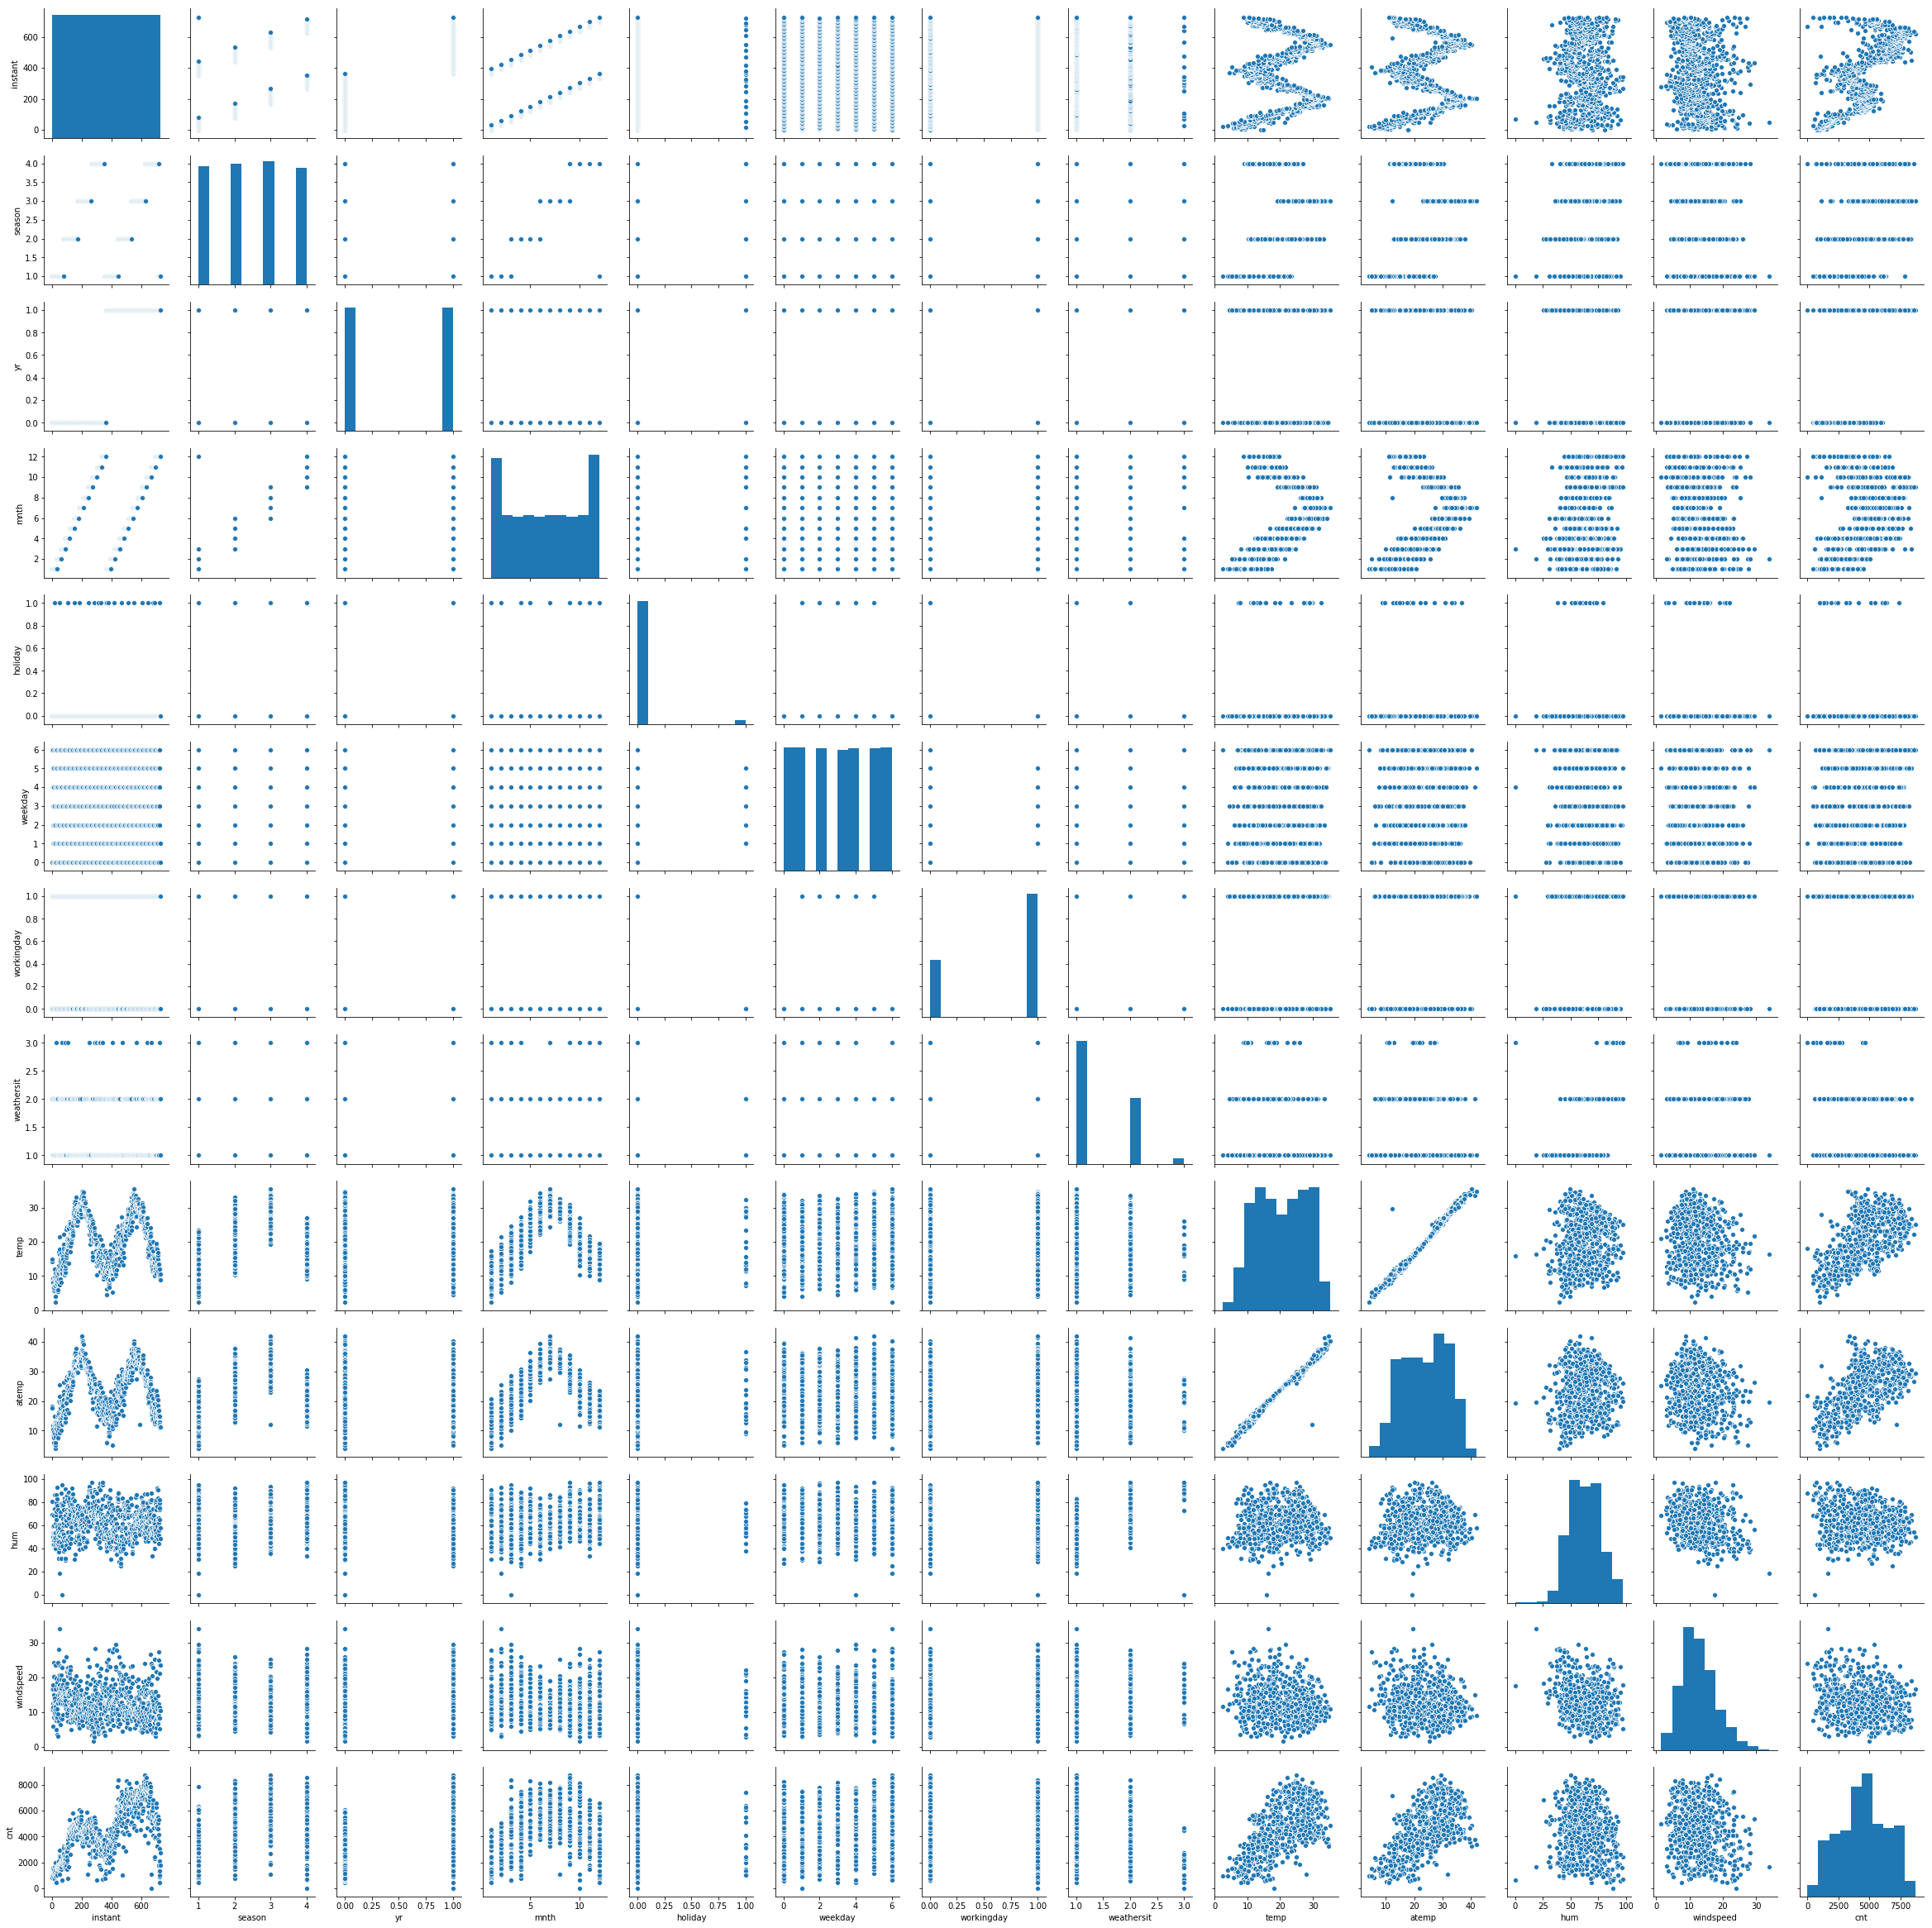

In [6]:
sns.pairplot(bike_day)
plt.show()

### Spliting the data into training and testing set


In [7]:
from sklearn.model_selection import train_test_split

In [8]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_day, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling feature

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
df_train.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
653      654  16-10-2019       4   1    10        0        2           1   
576      577  31-07-2019       3   1     7        0        2           1   
426      427  03-03-2019       1   1     3        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
482      483  28-04-2019       2   1     4        0        6           0   

     weathersit       temp    atemp      hum  windspeed   cnt  
653           1  19.201653  23.0423  55.8333  12.208807  7534  
576           1  29.246653  33.1448  70.4167  11.083475  7216  
426           2  16.980847  20.6746  62.1250  10.792293  4066  
728           1  10.489153  11.5850  48.3333  23.500518  1796  
482           2  15.443347  18.8752  48.9583   8.708325  4220

In [12]:

df_train["hour"] = [t.hour for t in pd.DatetimeIndex(df_train.dteday)]

df_train.head()



instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
653      654  16-10-2019       4   1    10        0        2           1   
576      577  31-07-2019       3   1     7        0        2           1   
426      427  03-03-2019       1   1     3        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
482      483  28-04-2019       2   1     4        0        6           0   

     weathersit       temp    atemp      hum  windspeed   cnt  hour  
653           1  19.201653  23.0423  55.8333  12.208807  7534     0  
576           1  29.246653  33.1448  70.4167  11.083475  7216     0  
426           2  16.980847  20.6746  62.1250  10.792293  4066     0  
728           1  10.489153  11.5850  48.3333  23.500518  1796     0  
482           2  15.443347  18.8752  48.9583   8.708325  4220     0

In [13]:

df_train = df_train.drop(['instant','dteday','hour'], axis=1)

In [14]:

df_train.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
653       4   1    10        0        2           1           1  19.201653   
576       3   1     7        0        2           1           1  29.246653   
426       1   1     3        0        6           0           2  16.980847   
728       1   1    12        0        0           0           1  10.489153   
482       2   1     4        0        6           0           2  15.443347   

       atemp      hum  windspeed   cnt  
653  23.0423  55.8333  12.208807  7534  
576  33.1448  70.4167  11.083475  7216  
426  20.6746  62.1250  10.792293  4066  
728  11.5850  48.3333  23.500518  1796  
482  18.8752  48.9583   8.708325  4220

In [15]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['season', 'mnth', 'weekday','weathersit','temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Z0042K0R\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
df_train.head()

season  yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000   1  0.818182        0  0.333333           1         0.0   
576  0.666667   1  0.545455        0  0.333333           1         0.0   
426  0.000000   1  0.181818        0  1.000000           0         0.5   
728  0.000000   1  1.000000        0  0.000000           0         0.0   
482  0.333333   1  0.272727        0  1.000000           0         0.5   

         temp     atemp       hum  windspeed       cnt  
653  0.509887  0.501133  0.575354   0.300794  0.864243  
576  0.815169  0.766351  0.725633   0.264686  0.827658  
426  0.442393  0.438975  0.640189   0.255342  0.465255  
728  0.245101  0.200348  0.498067   0.663106  0.204096  
482  0.395666  0.391735  0.504508   0.188475  0.482973

In [17]:
df_train.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.505882    0.507843    0.504456    0.025490    0.498366    0.676471   
std      0.370649    0.500429    0.315338    0.157763    0.336182    0.468282   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.000000    0.181818    0.000000    0.166667    0.000000   
50%      0.666667    1.000000    0.545455    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.818182    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count   510.00000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean      0.20098    0.537262    0.512989    0.650369    0.320768    0.513620  
std       0.27377    0.225844    0.212385    0.145882    0.169797    0.224593  
min       0.00000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.00000    0.339853    0.332086    0.538643    0.199179    0.356420  
50%       0.00000    0.540519    0.526811    0.653714    0.296763    0.518638  
75%       0.50000    0.735215    0.688457    0.754830    0.414447    0.684710  
max       1.00000    1.000000    1.000000    1.000000    1.000000    1.000000

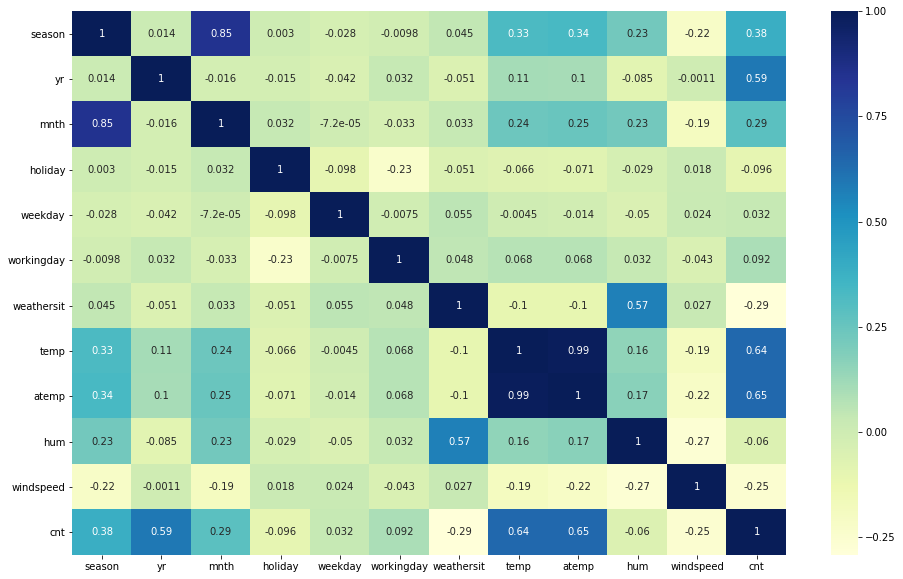

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### we can see that cnt(total rended bikes) are highly corelated with year, temp, atemp 
#### Also, month and season are highly related

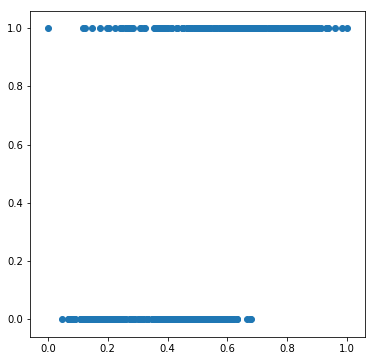

In [19]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.yr)
plt.show()

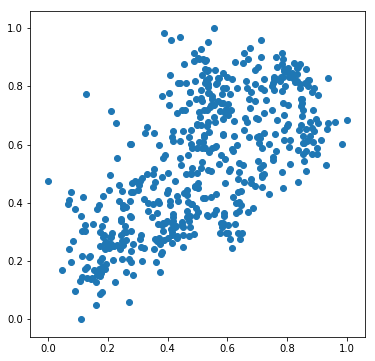

In [20]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

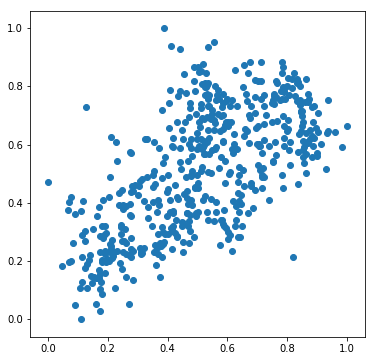

In [21]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

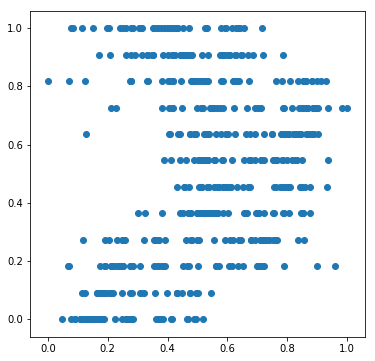

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.mnth)
plt.show()

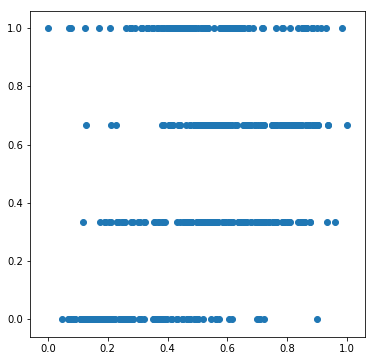

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.season)
plt.show()

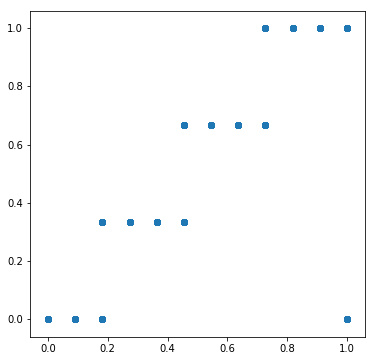

In [24]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.mnth, df_train.season)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

###### Building model

In [26]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [27]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

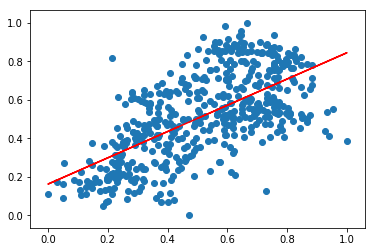

In [28]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.10e-61
Time:                        21:29:38   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [30]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp','yr']]

In [31]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [32]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.07e-131
Time:                        21:29:38   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

### Adding all the variables to the model

In [33]:
bike_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [34]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.180884
season        0.144377
yr            0.234621
mnth         -0.017775
holiday      -0.068852
weekday       0.047842
workingday    0.019317
weathersit   -0.161902
temp          0.217115
atemp         0.276325
hum          -0.093854
windspeed    -0.157316
dtype: float64

In [35]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.96e-169
Time:                        21:29:38   Log-Likelihood:                 455.82
No. Observations:                 510   AIC:                            -887.6
Df Residuals:                     498   BIC:                            -836.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.032      5.659      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

In [36]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8        atemp  346.98
7         temp  333.20
9          hum   16.09
2         mnth   13.32
0       season   11.30
10   windspeed    3.74
5   workingday    3.14
4      weekday    3.03
6   weathersit    2.19
1           yr    2.01
3      holiday    1.09

### Dropping the variable and updating the model

In [38]:
X = X_train.drop('temp', 1,)

In [39]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.13e-169
Time:                        21:29:38   Log-Likelihood:                 454.57
No. Observations:                 510   AIC:                            -887.1
Df Residuals:                     499   BIC:                            -840.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1781      0.032      5.573      0.0

In [41]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         hum  15.76
2        mnth  13.32
0      season  11.30
7       atemp   8.28
9   windspeed   3.65
5  workingday   3.14
4     weekday   3.02
6  weathersit   2.19
1          yr   2.01
3     holiday   1.09

### Dropping the Variable and Updating the Model

In [42]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [43]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.10e-169
Time:                        21:29:38   Log-Likelihood:                 451.79
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     500   BIC:                            -841.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1206      0.020      5.884      0.0

In [45]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        mnth  12.51
0      season  11.24
7       atemp   5.88
8   windspeed   3.35
5  workingday   2.94
4     weekday   2.91
1          yr   2.00
6  weathersit   1.54
3     holiday   1.07

### Dropping the variable and updating the model

In [46]:
X = X.drop('mnth', 1)

In [47]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.02e-170
Time:                        21:29:39   Log-Likelihood:                 451.36
No. Observations:                 510   AIC:                            -884.7
Df Residuals:                     501   BIC:                            -846.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1162      0.020      5.830      0.0

In [48]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6       atemp  5.86
7   windspeed  3.29
0      season  3.18
4  workingday  2.93
3     weekday  2.86
1          yr  2.00
5  weathersit  1.53
2     holiday  1.06

### Residual Analysis of the train data

In [49]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

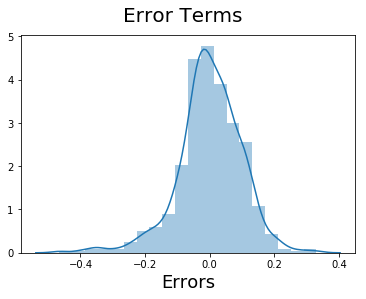

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

 ### Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [51]:
num_vars = ['season', 'mnth', 'weekday','weathersit','temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
df_test.describe()

instant      season          yr        mnth     holiday     weekday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean   356.776256    0.485540    0.479452    0.497717    0.036530    0.503044   
std    213.665198    0.369821    0.500722    0.311080    0.188034    0.331402   
min      4.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    171.000000    0.000000    0.000000    0.272727    0.000000    0.166667   
50%    349.000000    0.333333    0.000000    0.454545    0.000000    0.500000   
75%    537.500000    0.666667    1.000000    0.727273    0.000000    0.833333   
max    730.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.698630    0.187215    0.558941    0.532991    0.638508    0.313350   
std      0.459904    0.269422    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      1.000000    0.000000    0.558691    0.549198    0.627737    0.299459   
75%      1.000000    0.500000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

              cnt  
count  219.000000  
mean     0.520592  
std      0.218435  
min      0.048205  
25%      0.377531  
50%      0.524275  
75%      0.672745  
max      0.963300

#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [55]:
X_test_m4 = X_test_m4.drop(["temp", "hum", "mnth","instant","dteday"], axis = 1)

In [56]:
X_test_m4.head()

const    season  yr  holiday   weekday  workingday  weathersit     atemp  \
184    1.0  0.666667   0        1  0.166667           0         0.5  0.769660   
535    1.0  0.333333   1        0  0.500000           1         0.0  0.842587   
299    1.0  1.000000   0        0  0.666667           1         0.5  0.496145   
221    1.0  0.666667   0        0  0.500000           1         0.0  0.795343   
152    1.0  0.333333   0        0  0.666667           1         0.0  0.741471   

     windspeed  
184   0.084219  
535   0.153728  
299   0.334206  
221   0.339570  
152   0.537414

In [57]:

y_pred_m4 = lr_4.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

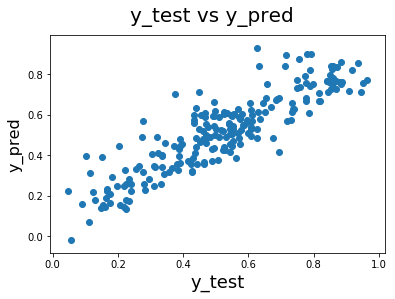

In [58]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  


We can see that the equation of our best fitted line is:

Rented bikes = 0.4972  * atemp + 0.1275 * season + 0.2373 * yr + (-0.0685) * holiday + weekday * 0.0518 + workingday * 0.0202 + 
weathersit * (-0.1910) + windspeed * (-0.1310)